# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Aus/aus.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(768, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  \
0     41883  286080  1969     33.05     26.15     323.0      87.5  1.35   
1     41978  264775  1969     33.25     24.75     699.5      88.0  4.40   
2     41933  566325  1969     34.15     24.80     601.5      88.5  2.40   
3     41923  499125  1969     33.05     26.00     369.0      87.0  2.00   
4     41863  484460  1969     35.30     26.50     482.5      87.0  0.90   

   Cloud  Sunshine  ALT  Productions          PPH  
0   6.00     4.200   20        95240   0.33291387  
1   6.50     4.800    6       121470  0.458766878  
2   4.80     4.900   10       224045   0.39561206  
3   5.95     5.350    9       185035  0.370718758  
4   5.25     4.748   37       187185  0.386378648

In [7]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  \
763     41895  117246  2013     36.65     26.50     177.5      85.5  2.45   
764     41966   14036  2013     34.75     24.95     237.0      85.0  1.70   
765     41859       0  2013     35.25     26.50     282.0      82.5  2.20   
766     41891   91034  2013     35.40     25.70     543.5      84.5  3.15   
767     41909    2905  2013     35.65     26.20     172.0      83.5  2.40   

     Cloud  Sunshine  ALT  Productions          PPH  
763   5.70      4.95   20       113956  0.971939341  
764   5.50      4.35   63        10987   0.78277287  
765   6.75      4.85   34            0      #DIV/0!  
766   7.25      3.80   35       110837  1.217534108  
767   5.85      4.30   10         2347  0.807917384

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     768 non-null    int64  
 1   Area         768 non-null    int64  
 2   Year         768 non-null    int64  
 3   Max_Temp     768 non-null    float64
 4   Min_Temp     768 non-null    float64
 5   Rainfall     768 non-null    float64
 6   Humidity     768 non-null    float64
 7   Wind         768 non-null    float64
 8   Cloud        768 non-null    float64
 9   Sunshine     768 non-null    float64
 10  ALT          768 non-null    int64  
 11  Productions  768 non-null    int64  
 12  PPH          768 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 78.1+ KB


In [9]:
data.describe()

District          Area         Year    Max_Temp    Min_Temp  \
count    768.000000  7.680000e+02   768.000000  768.000000  768.000000   
mean   41919.528646  2.480427e+05  1991.878906   34.570182   25.855078   
std       34.848739  2.065323e+05    12.729548    1.122179    0.580984   
min    41859.000000  0.000000e+00  1969.000000   30.650000   23.000000   
25%    41891.000000  8.552725e+04  1981.000000   33.987500   25.500000   
50%    41923.000000  2.004200e+05  1992.000000   34.650000   25.950000   
75%    41950.000000  3.838412e+05  2003.000000   35.300000   26.250000   
max    41978.000000  1.089970e+06  2013.000000   38.400000   27.250000   

          Rainfall    Humidity        Wind       Cloud    Sunshine  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean    413.939921   86.259365    1.876172    6.115951    4.386876   
std     183.767527    2.220997    1.081454    0.543945    0.746137   
min      73.500000   78.000000    0.150000    3.000000    1.800000   
25%     284.000000   85.000000    1.200000    5.800000    3.950000   
50%     380.250000   86.500000    1.600000    6.150000    4.400000   
75%     511.875000   87.500000    2.212500    6.450000    4.800000   
max    1407.000000   94.500000    7.350000    7.500000    6.900000   

              ALT    Productions  
count  768.000000     768.000000  
mean    17.041667  108094.092448  
std     14.767766   76944.138885  
min      3.000000       0.000000  
25%      6.000000   39282.500000  
50%     10.000000  104570.500000  
75%     20.000000  157883.750000  
max     63.000000  367785.000000

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District       0
Area           6
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    6
PPH            0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

12

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data['Area'] = data.Area.astype(int)
data['Productions'] = data.Area.astype(int)
data['PPH'] = pd.to_numeric(data['PPH'])

In [17]:
data.shape

(762, 13)

In [18]:
data.head()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  \
0     41883  286080  1969     33.05     26.15     323.0      87.5  1.35   
1     41978  264775  1969     33.25     24.75     699.5      88.0  4.40   
2     41933  566325  1969     34.15     24.80     601.5      88.5  2.40   
3     41923  499125  1969     33.05     26.00     369.0      87.0  2.00   
4     41863  484460  1969     35.30     26.50     482.5      87.0  0.90   

   Cloud  Sunshine  ALT  Productions       PPH  
0   6.00     4.200   20       286080  0.332914  
1   6.50     4.800    6       264775  0.458767  
2   4.80     4.900   10       566325  0.395612  
3   5.95     5.350    9       499125  0.370719  
4   5.25     4.748   37       484460  0.386379

In [19]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  \
757     41960   53095  2013     34.10     26.15     481.5      90.0  2.15   
758     41895  117246  2013     36.65     26.50     177.5      85.5  2.45   
759     41966   14036  2013     34.75     24.95     237.0      85.0  1.70   
760     41891   91034  2013     35.40     25.70     543.5      84.5  3.15   
761     41909    2905  2013     35.65     26.20     172.0      83.5  2.40   

     Cloud  Sunshine  ALT  Productions       PPH  
757   6.20      4.20    3        53095  1.200527  
758   5.70      4.95   20       117246  0.971939  
759   5.50      4.35   63        14036  0.782773  
760   7.25      3.80   35        91034  1.217534  
761   5.85      4.30   10         2905  0.807917

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     762 non-null    int64  
 1   Area         762 non-null    int64  
 2   Year         762 non-null    int64  
 3   Max_Temp     762 non-null    float64
 4   Min_Temp     762 non-null    float64
 5   Rainfall     762 non-null    float64
 6   Humidity     762 non-null    float64
 7   Wind         762 non-null    float64
 8   Cloud        762 non-null    float64
 9   Sunshine     762 non-null    float64
 10  ALT          762 non-null    int64  
 11  Productions  762 non-null    int64  
 12  PPH          762 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 77.5 KB


#### b. Removing Outliers 

In [21]:
z = np.abs(stats.zscore(data))

In [22]:
np.where(z > 4)

(array([  8,   8,  63, 203, 224, 241, 250, 281, 404, 450, 461, 482, 716,
        729, 734, 752]),
 array([ 1, 11,  8,  8,  5,  5,  7,  4,  4,  8,  8,  5,  7,  7,  7,  7]))

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False     False     False     False     False  False   
1       False  False  False     False     False     False     False   True   
2       False  False  False     False     False     False     False  False   
3       False  False  False     False     False     False     False  False   
4       False  False  False     False     False     False     False  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
757     False  False  False     False     False     False     False  False   
758     False  False  False     False     False     False     False  False   
759     False  False  False     False     False     False     False  False   
760     False  False  False     False     False     False     False  False   
761     False  False  False     False     False     False     False  False   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1    False     False  False        False  False  
2     True     False  False        False  False  
3    False     False  False        False  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
757  False     False  False        False   True  
758  False     False  False        False  False  
759  False     False   True        False  False  
760  False     False  False        False   True  
761  False     False  False        False  False  

[762 rows x 13 columns]

In [25]:
data.shape

(762, 13)

In [26]:
data = data[(z < 4).all(axis=1)]

In [27]:
data.shape

(747, 13)

## Spliting Data

In [28]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [30]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


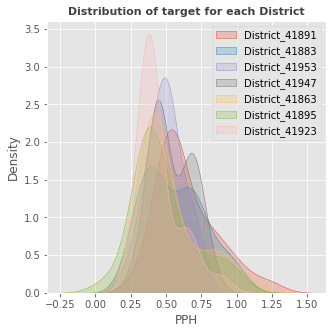

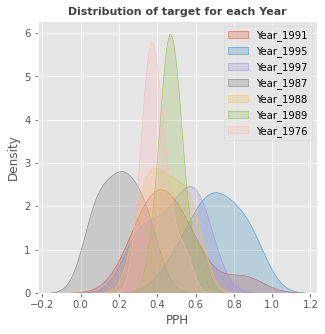

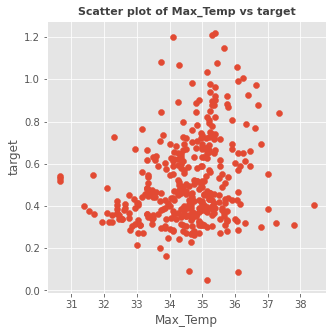

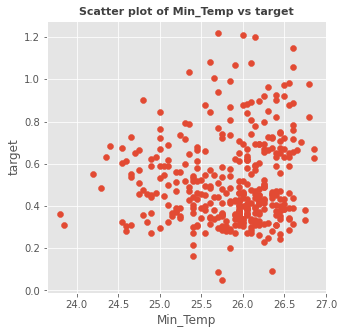

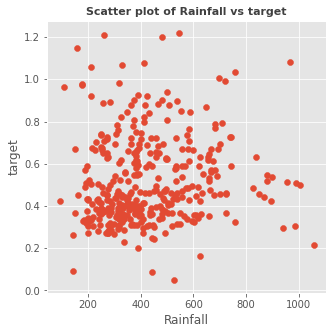

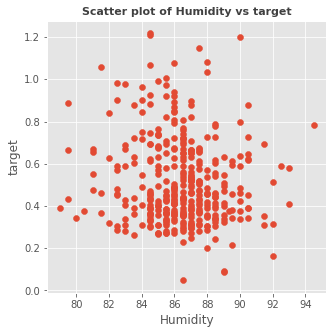

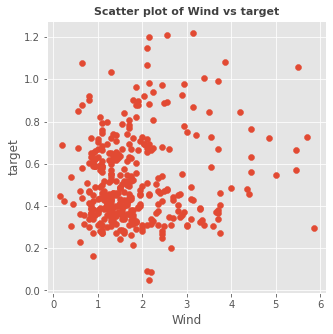

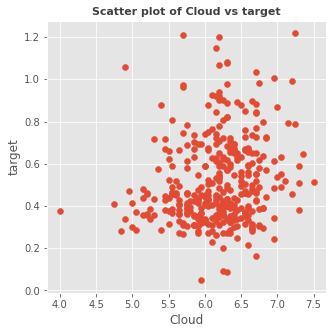

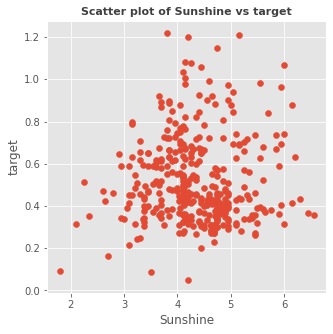

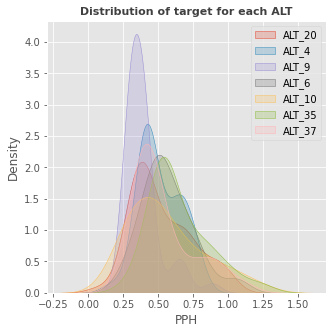

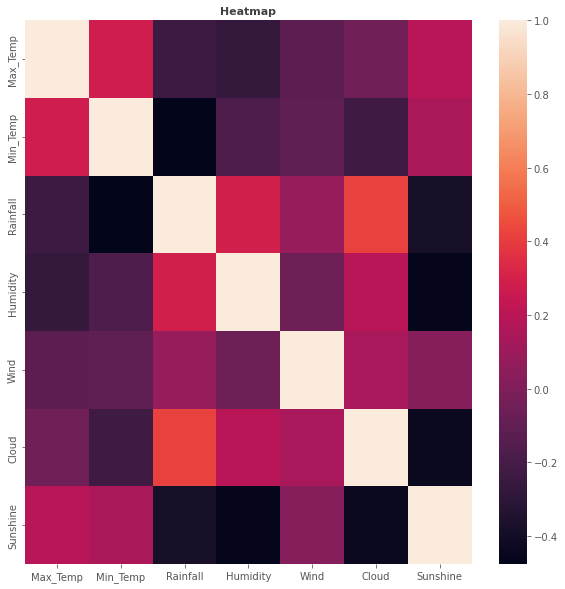

In [31]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/aus")

## Creating AutoML Models

In [32]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Aus")

In [33]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [34]:
predictions = automl.predict(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### a. RMSE

In [35]:
metrics.mean_squared_error(y_test, predictions)

0.004809703765741328

#### b. MAE

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.0461038683968135

#### c. R2

In [37]:
metrics.r2_score(y_test, predictions)

0.8569795140861136

In [38]:
y_pred = automl.predict(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


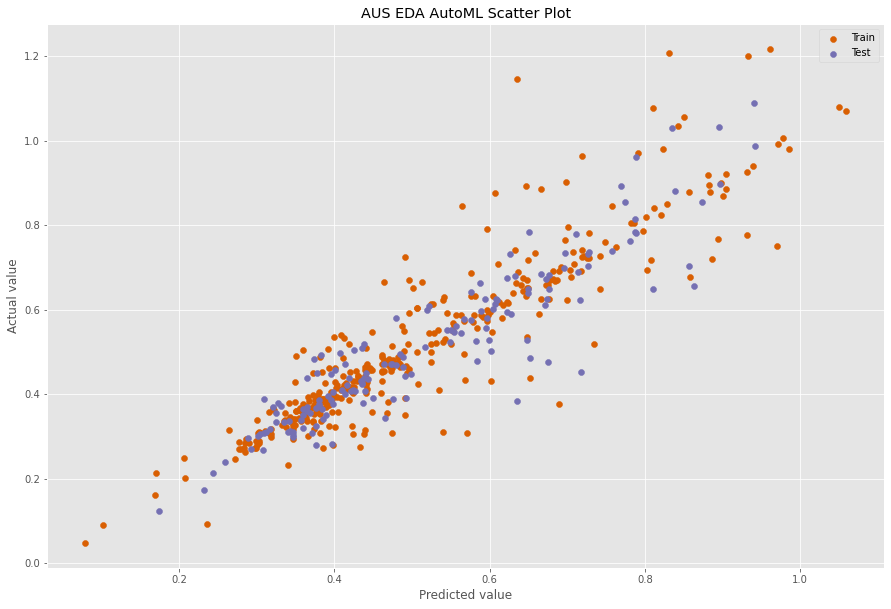

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AUS EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aus_automl_scatter.png")
plt.show()

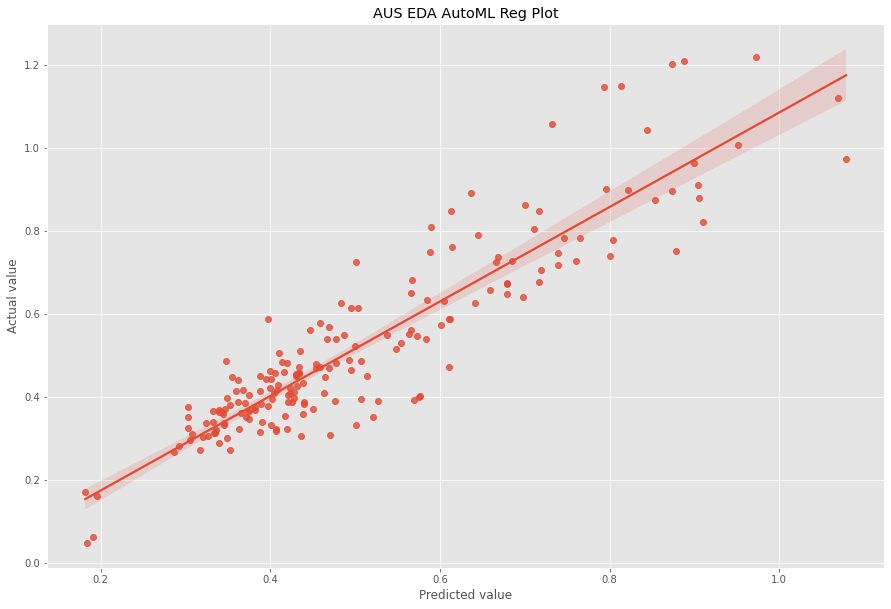

In [103]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AUS EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aus_eda_automl_reg.png")

## 2. AutoSklearn Regression

In [41]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/aus',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [42]:
autosk.fit(X_train, y_valid, dataset_name='data')

AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/aus')

In [43]:
autosk.leaderboard()

rank  ensemble_weight               type      cost  duration
model_id                                                              
7            1              0.5  gradient_boosting  0.280046  1.305752
8            2              0.4  gradient_boosting  0.288950  1.138822
10           3              0.1        extra_trees  0.337708  1.774941

In [44]:
print(autosk.show_models())

[(0.500000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 952, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 1.8428972335335263e-10, 'regressor:gradient_boosting:learning_rate': 0.012607824914758717, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gr

In [45]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [46]:
metrics.mean_squared_error(y_test, predictions)

0.012742920366871883

#### b. MAE

In [47]:
metrics.mean_absolute_error(y_test, predictions)

0.0757638878020831

#### c. R2

In [48]:
metrics.r2_score(y_test, predictions)

0.6210788124180718

In [49]:
y_pred = autosk.predict(X_train)

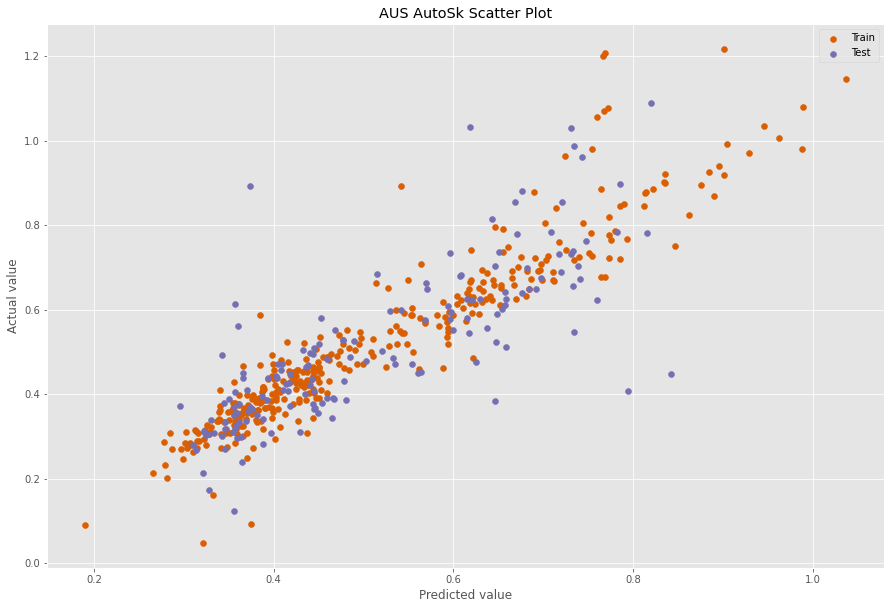

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AUS AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aus_autosk_scatter.png")
plt.show()

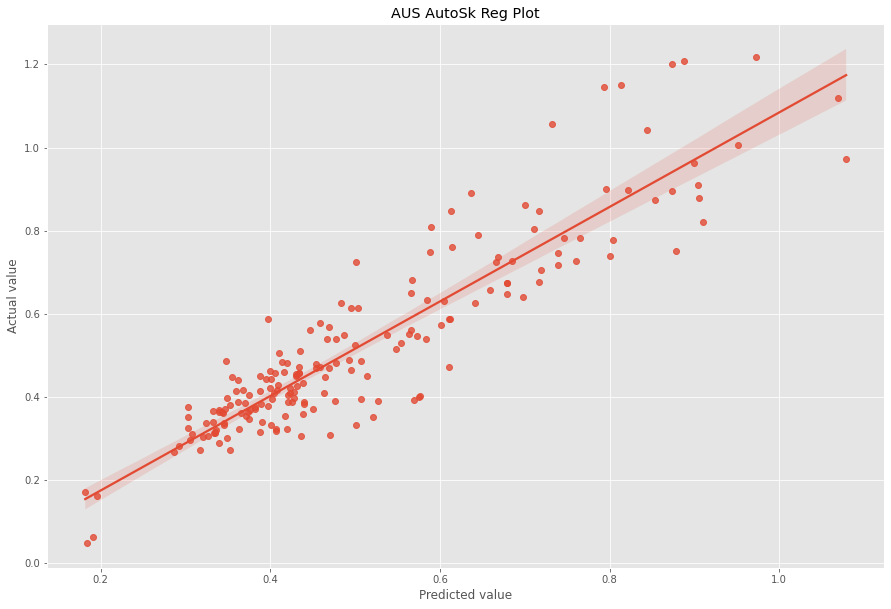

In [105]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AUS AutoSk Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aus_autosk_reg.png")

## 3. AutoGluon

In [52]:
train_data = TabularDataset('dataset/Aus/train_data.csv')

In [53]:
test_data = TabularDataset('dataset/Aus/test_data.csv')

In [54]:
# Checking 0 values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           6
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    6
PPH            0
dtype: int64

In [55]:
# Replace 0's with NaN
train_data.replace(0, np.nan, inplace=True)
test_data.replace(0, np.nan, inplace=True)

In [56]:
train_data.isnull().sum().sum()
test_data.isnull().sum().sum()

12

In [57]:
# Drop all NaN values
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [58]:
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [59]:
# Be ensure about 0's and NaN values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [60]:
train_data['Area'] = train_data.Area.astype(int)
train_data['Productions'] = train_data.Area.astype(int)
train_data['PPH'] = pd.to_numeric(train_data['PPH'])
test_data['Area'] = test_data.Area.astype(int)
test_data['Productions'] = test_data.Area.astype(int)
test_data['PPH'] = pd.to_numeric(test_data['PPH'])

In [61]:
label = 'PPH'

In [62]:
data[label].describe()

count    747.000000
mean       0.518976
std        0.206089
min        0.047224
25%        0.369447
50%        0.461017
75%        0.632377
max        1.261951
Name: PPH, dtype: float64

In [63]:
save_path = 'autogluon/aus'

In [64]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [65]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-18 23:41:32,532:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/aus"
[WARNING] [2021-09-18 23:41:32,533:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.062975       0.006155  1.613014                0.000298           0.264472            2       True         52
1          LightGBM/T16  -0.063167       0.001529  0.342808                0.001529           0.342808            1       True         17
2          LightGBM/T15  -0.063464       0.001423  0.403037                0.001423           0.403037            1       True         16
3          LightGBM/T22  -0.063726       0.002907  0.602697                0.002907           0.602697            1       True         23
4          LightGBM/T11  -0.064537       0.001346  0.346700                0.001346           0.346700            1       True         12
5          LightGBM/T19  -0.064724       0.001412  0.375803                0.001412           0.375803        

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'LightGBM/T21': 'LGBModel',
  'LightGBM/T22': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'XGBoost/T6': 'XGBoostModel',
  'XGBoost/T7': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T9': '

In [67]:
perf = predictor.evaluate(test_data)

In [68]:
y_pred = predictor.predict_proba(test_data)

In [69]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [70]:
perf

{'root_mean_squared_error': -0.22796479594066765,
 'mean_squared_error': -0.05196794818827024,
 'mean_absolute_error': -0.18002810681306358,
 'r2': -0.06099280544708319,
 'pearsonr': 0.444113215572097,
 'median_absolute_error': -0.14951678226777654}

## 4. Hyperopt

In [71]:
n_iter=10

In [72]:
num_folds=2

In [73]:
kf = KFold(n_splits=num_folds, random_state=None)

In [74]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [75]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

0.01916267654082667

#### b. MAE

In [76]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.09658880869388267

#### c. R2

In [77]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.2149728698593293

## 5. TPOT

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [80]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.012951439650518023

Generation 2 - Current best internal CV score: -0.012951439650518023

Generation 3 - Current best internal CV score: -0.012287722922445666

Generation 4 - Current best internal CV score: -0.01197382090590648

Generation 5 - Current best internal CV score: -0.010480233729487297

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=11, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [81]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [82]:
metrics.mean_squared_error(y_test, predictions)

0.00919327587341695

#### b. MAE

In [83]:
metrics.mean_absolute_error(y_test, predictions)

0.06518906377419607

#### c. R2

In [84]:
metrics.r2_score(y_test, predictions)

0.8168056667887251

In [85]:
y_pred = tpot.predict(X_train)

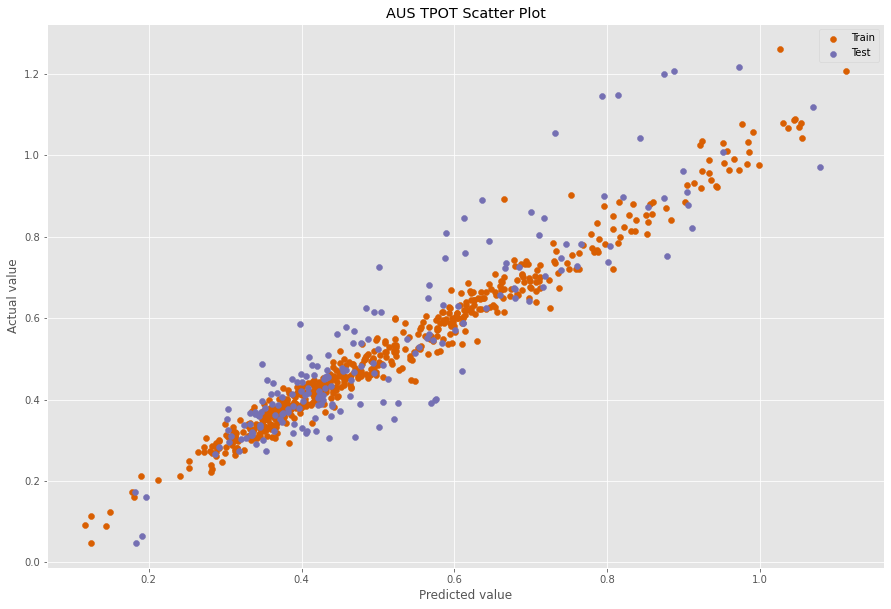

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AUS TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aus_tpot_scatter.png")
plt.show()

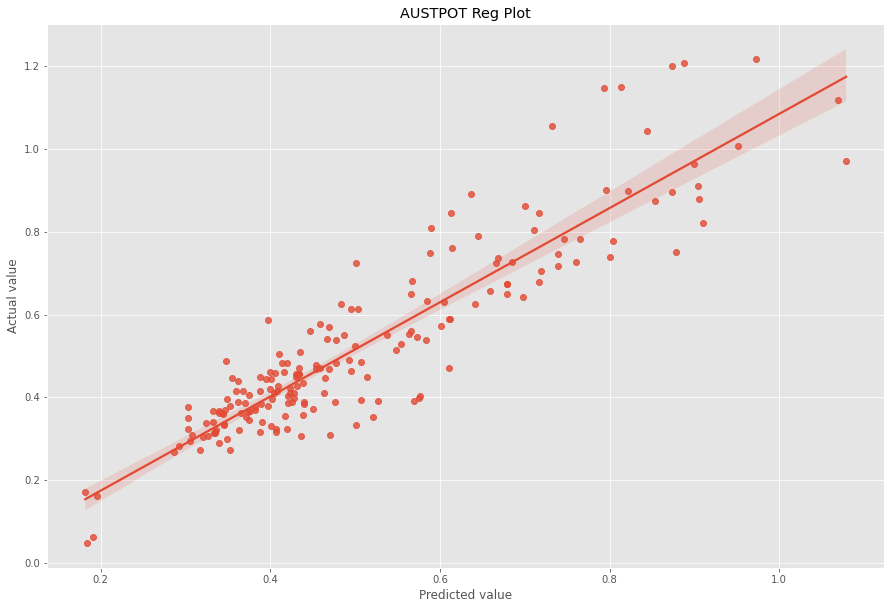

In [87]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AUS TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aus_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [88]:
import evalml
from evalml import AutoMLSearch

In [89]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [90]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


In [91]:
automl.rankings

id                                      pipeline_name  search_order  \
0   3                       XGBoost Regressor w/ Imputer             3   
1   5                 Random Forest Regressor w/ Imputer             5   
2   7                      LightGBM Regressor w/ Imputer             7   
3   2                   Extra Trees Regressor w/ Imputer             2   
4   6                 Decision Tree Regressor w/ Imputer             6   
5   1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
6   4                      CatBoost Regressor w/ Imputer             4   
7   0                  Mean Baseline Regression Pipeline             0   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.702219                     0.043044          0.727768   
1       0.691099                     0.042300          0.732413   
2       0.663691                     0.046731          0.711168   
3       0.641466                     0.043752          0.690877   
4       0.541002                     0.090223          0.621301   
5       0.489938                     0.072970          0.571414   
6       0.176192                     0.009965          0.182707   
7      -0.030715                     0.031692         -0.015684   

   percent_better_than_baseline  high_variance_cv  \
0                   2386.212589             False   
1                   2350.010089             False   
2                   2260.777454             False   
3                   2188.419534             False   
4                   1861.338981             False   
5                   1695.089623             False   
6                    673.629173             False   
7                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7       {'Baseline Regressor': {'strategy': 'mean'}}

In [92]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [93]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


********************************
* XGBoost Regressor w/ Imputer *
********************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.8 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.728        0.737     0.492     0.053 0.014 0.077                    0.119        348          174
1           0.726        0.731     0.470     0.064 0.014 0.086                    0.117        348          174
2           0.653        0.660     0.488     0.051 0.013 0.081                    0.114        348

In [94]:
automl.describe_pipeline(1)


******************************************************
* Elastic Net Regressor w/ Imputer + Standard Scaler *
******************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.3 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.571        0.596     0.488     0.081 0.022 0.110                    0.149        348          174
1           0.468        0.469     0.452     0.105 0.027 0.129                    0.163        348          174
2           0.431        

In [95]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.030715388752371304,
   'standard_deviation_cv_score': 0.03169249690695969,
   'high_variance_cv': False,
   'training_time': 0.05029606819152832,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -0.015683546422411876),
                  ('ExpVariance', 0.0),
                  ('MaxError', 0.6942908881954024),
                  ('MedianAE', 0.1493194686954024),
                  ('MSE', 0.05274933917107236),
                  ('MAE', 0.17756421351578808),
                  ('Root Mean Squared Error', 0.22967224292689867),
                  ('# Training', 348),
                  ('# Validation', 174)]),
     'mean_cv_score': -0.015683546422411876,
     'binary_cl

In [96]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

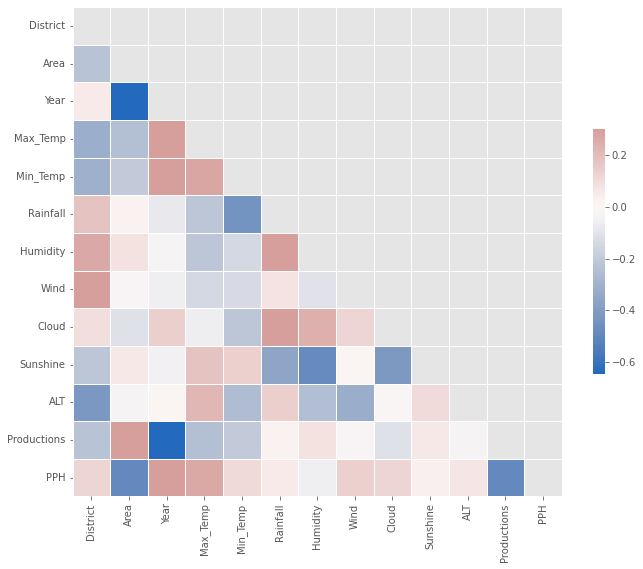

In [97]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

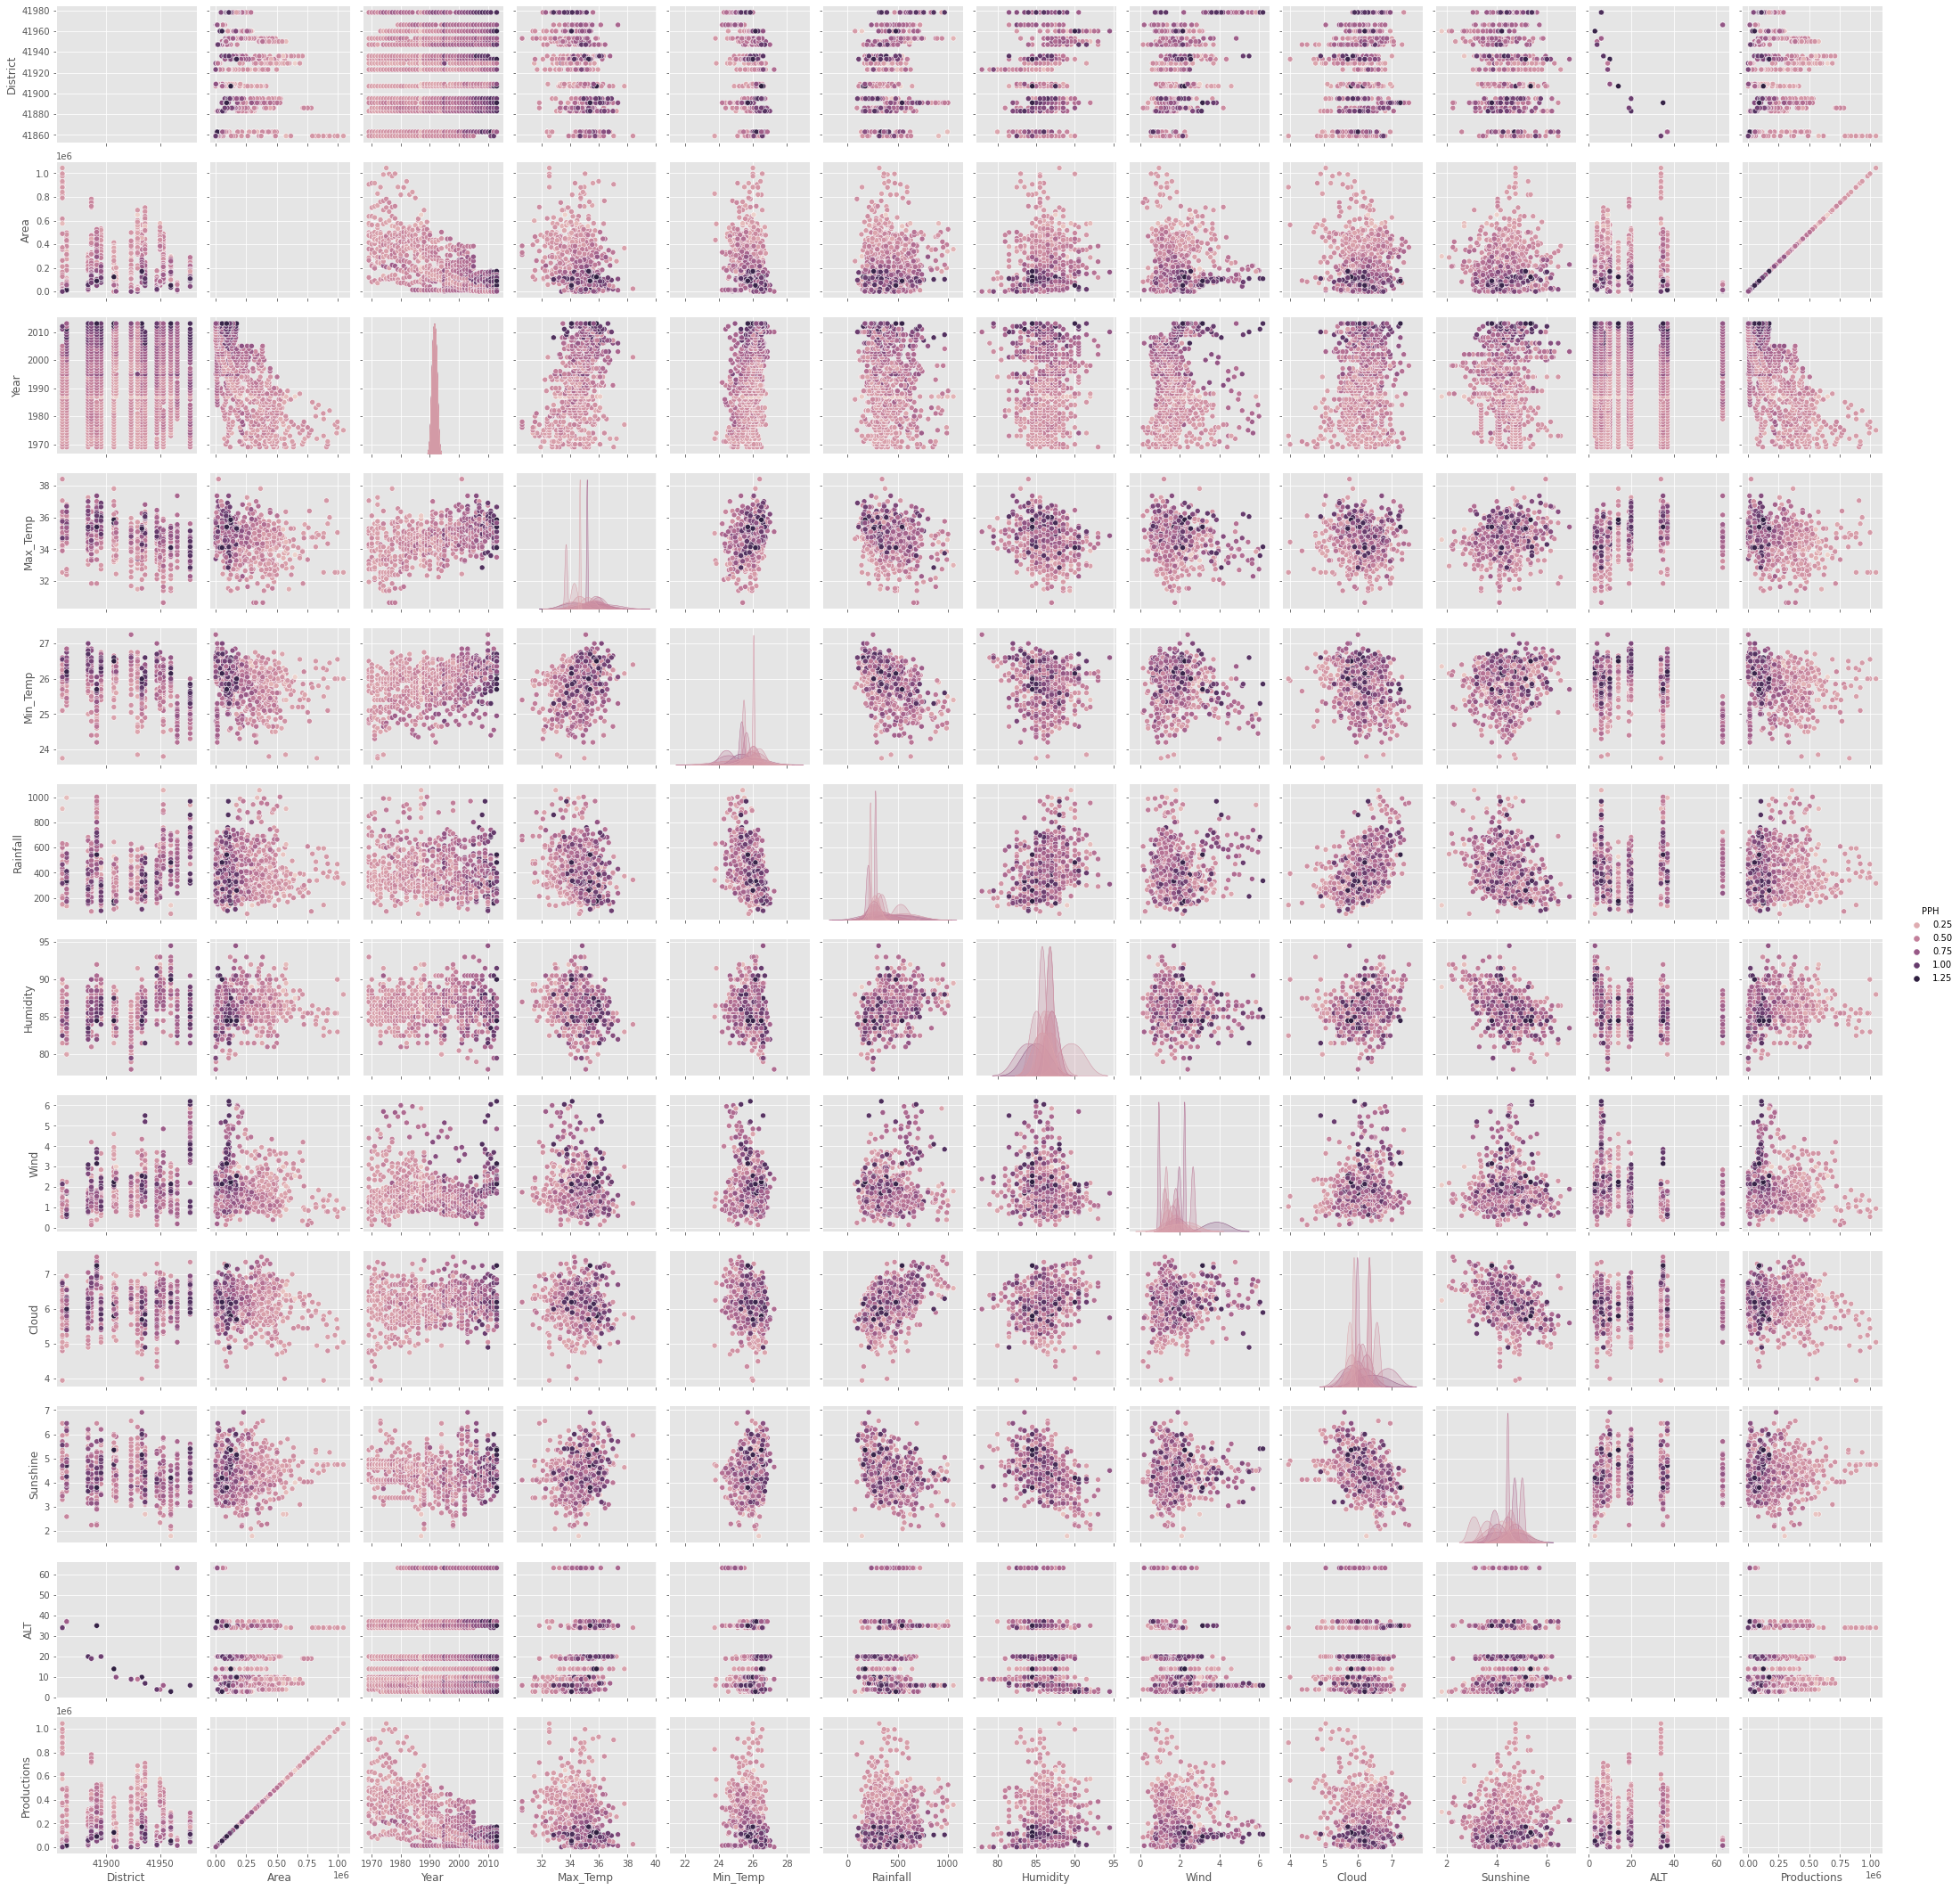

In [98]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [99]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [100]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [101]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [102]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>